# Importamos las librearías

In [1]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.integrate import solve_ivp
import pandas as pd
import pickle

# Creamos la base de datos

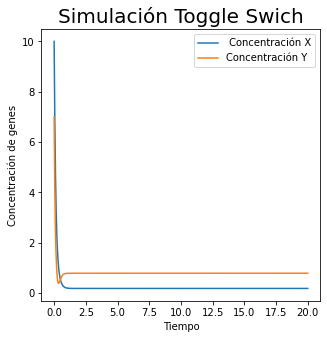

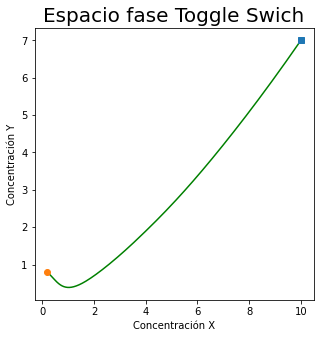

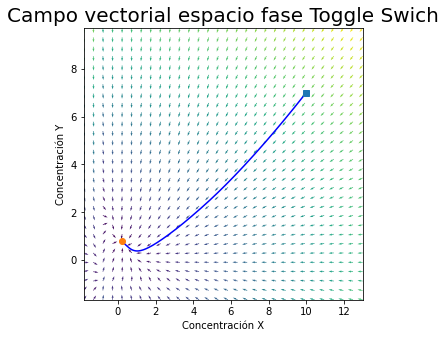

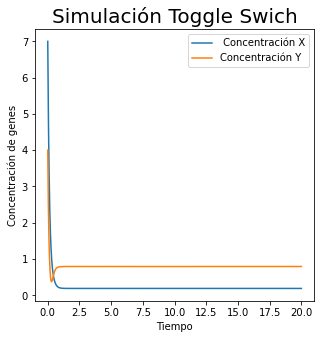

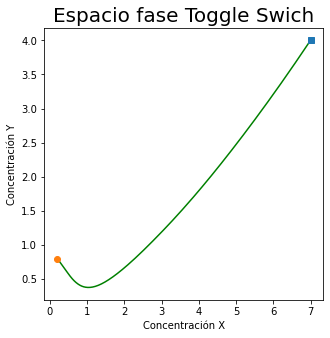

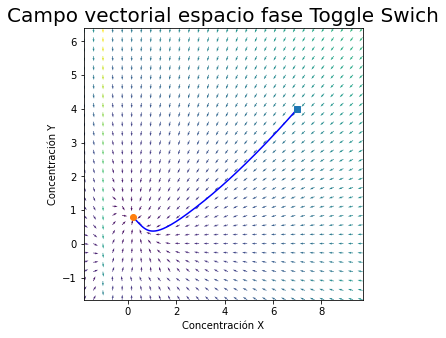

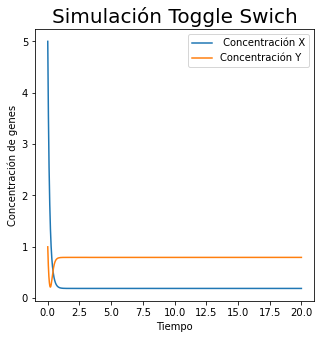

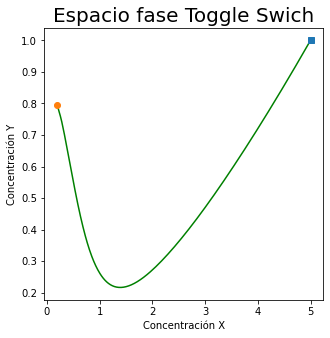

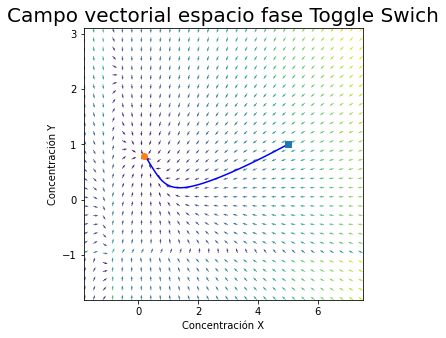

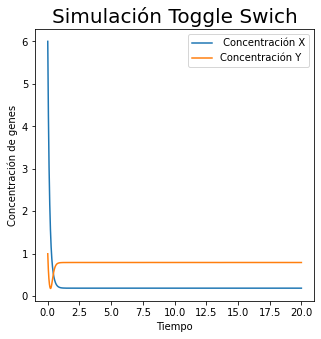

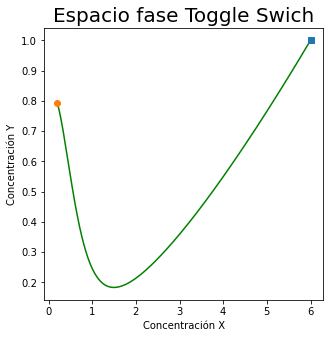

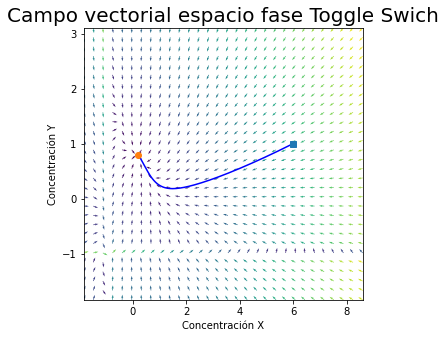

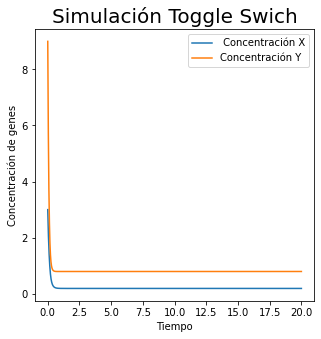

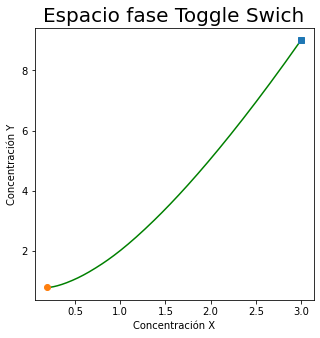

--------------------------------------------


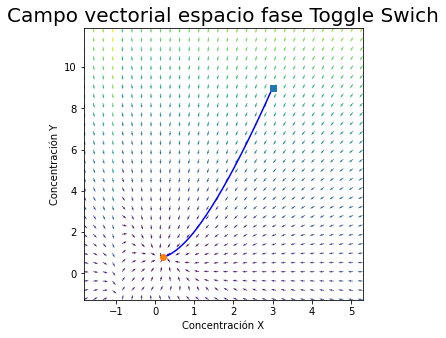

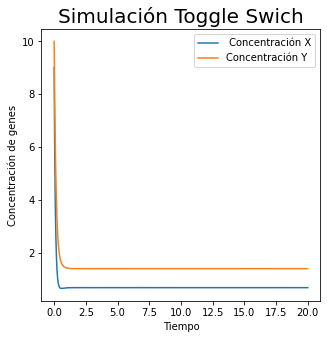

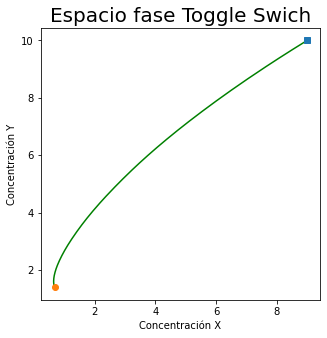

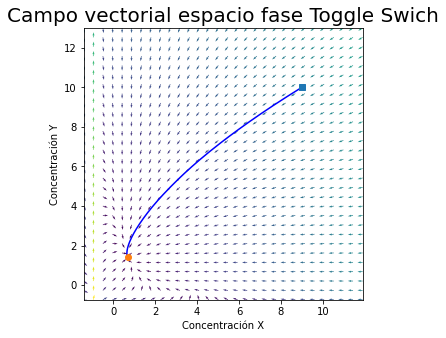

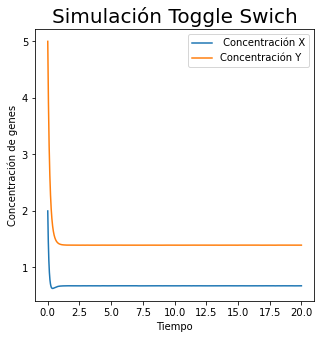

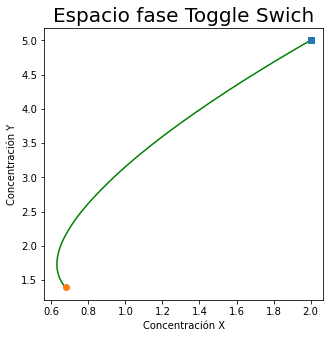

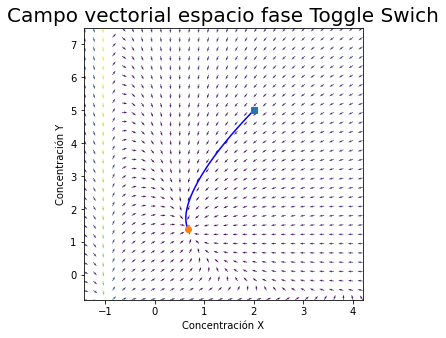

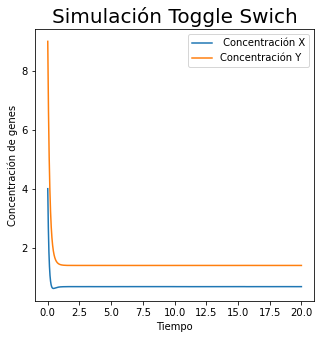

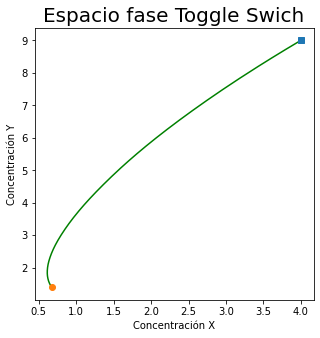

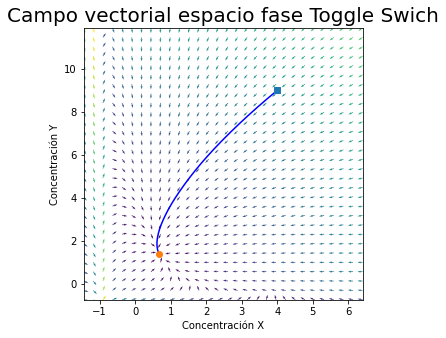

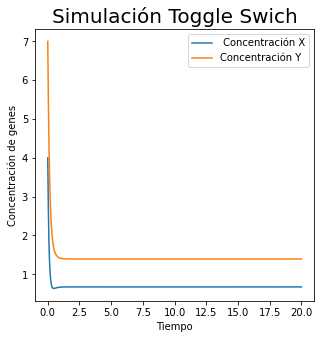

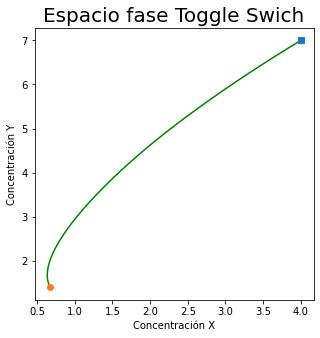

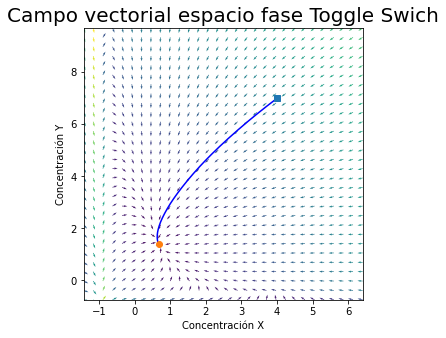

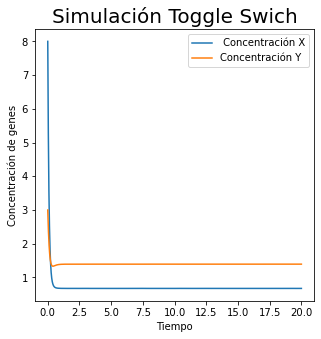

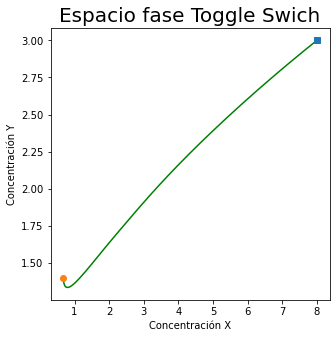

--------------------------------------------


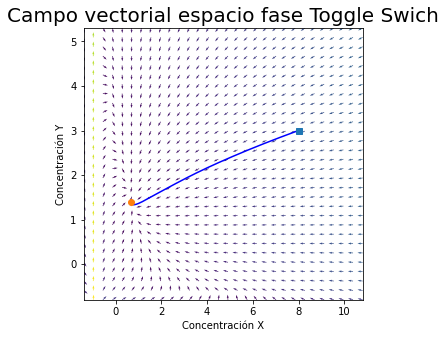

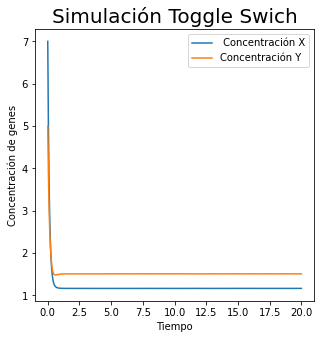

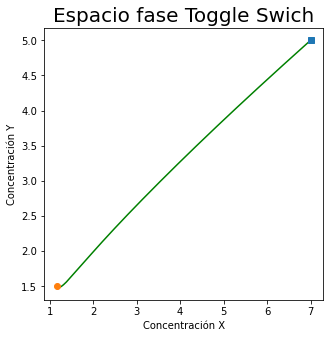

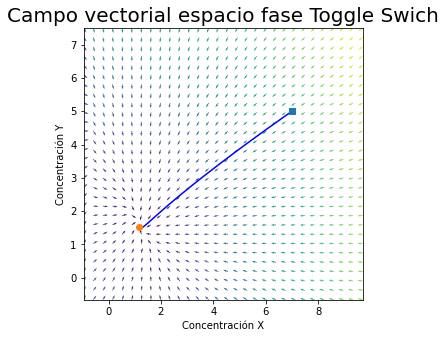

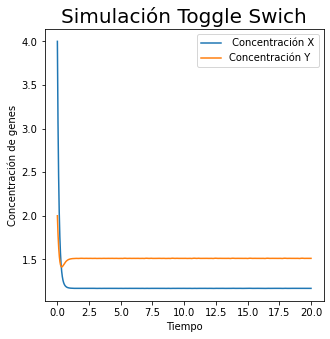

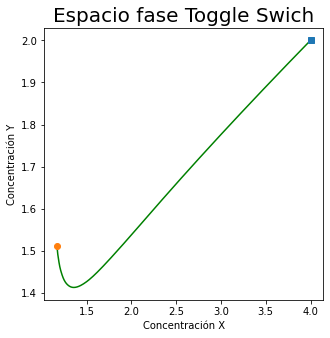

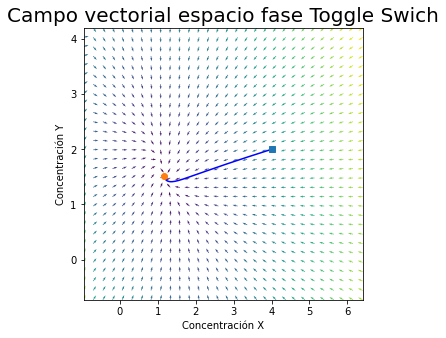

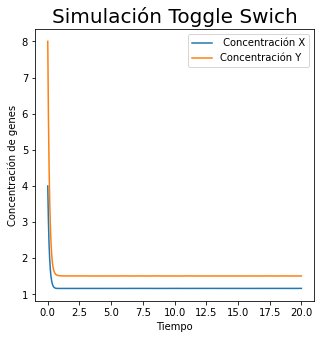

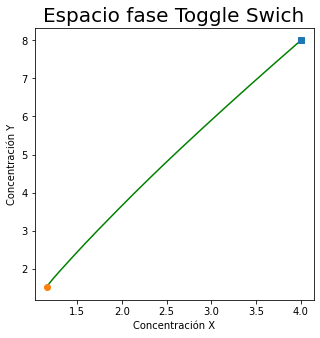

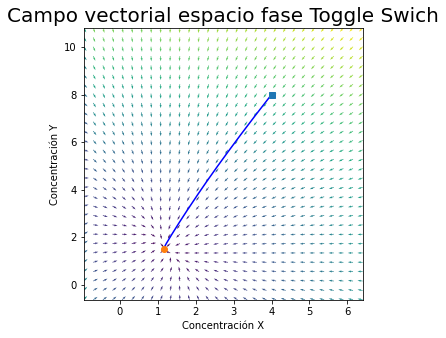

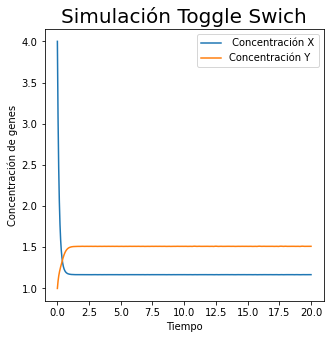

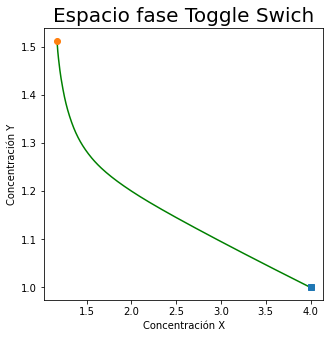

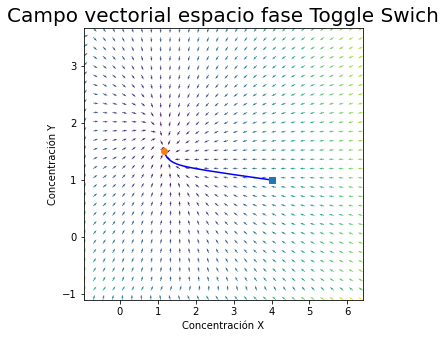

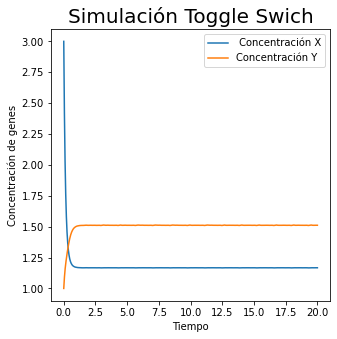

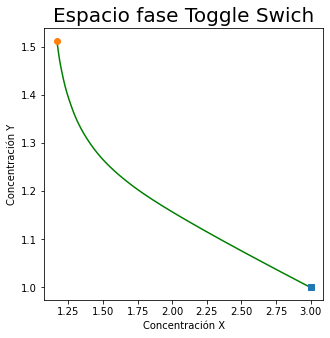

--------------------------------------------


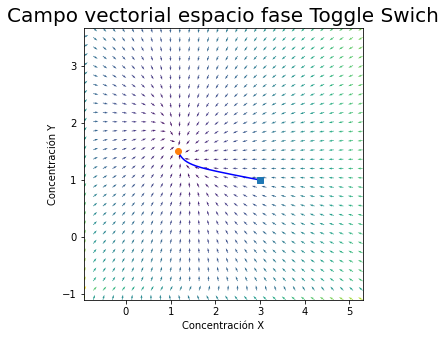

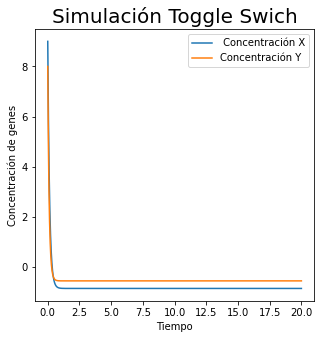

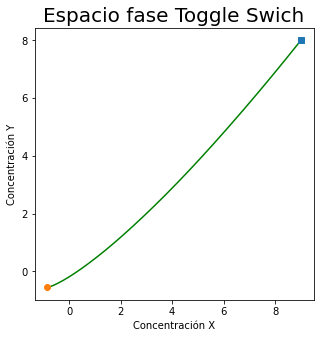

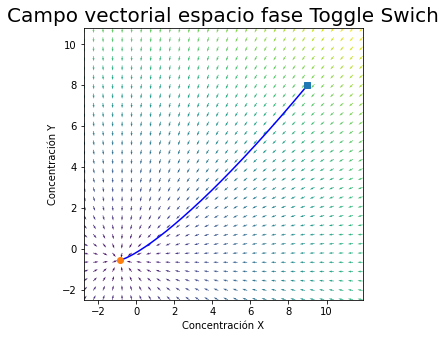

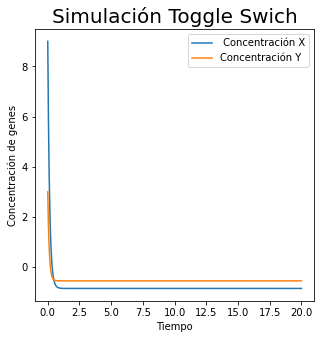

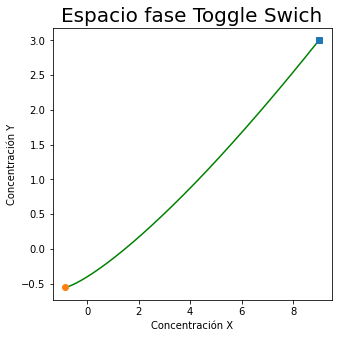

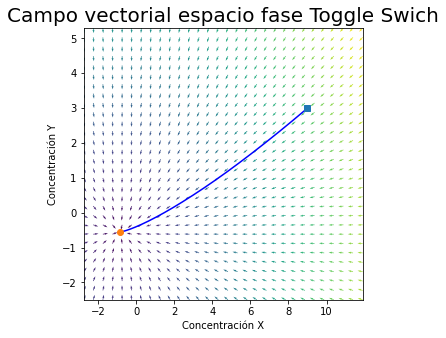

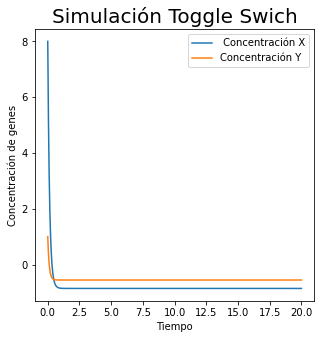

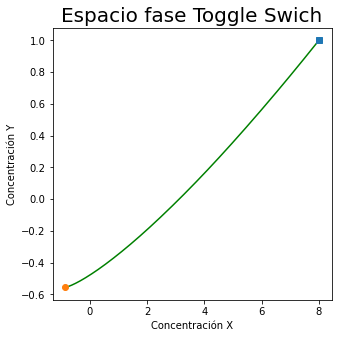

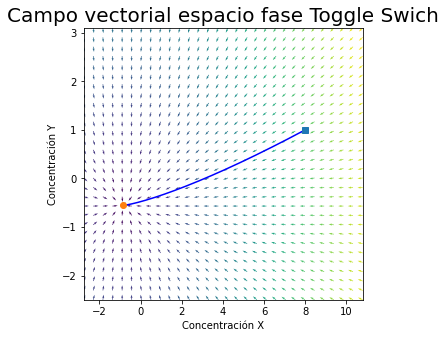

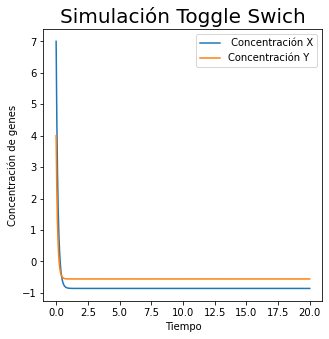

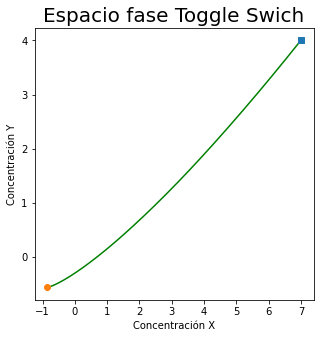

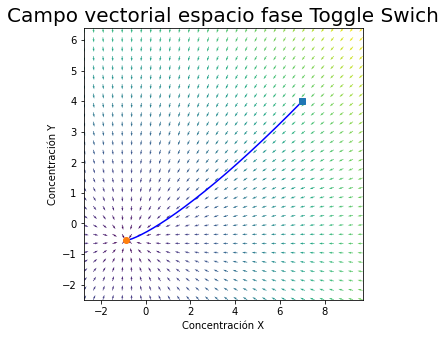

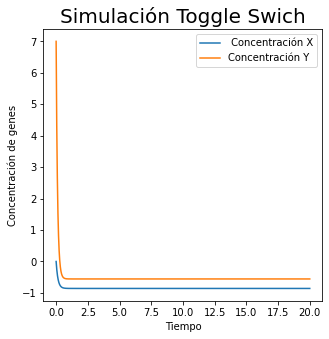

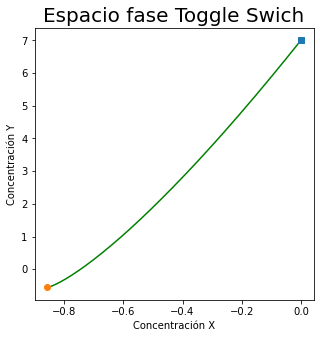

--------------------------------------------


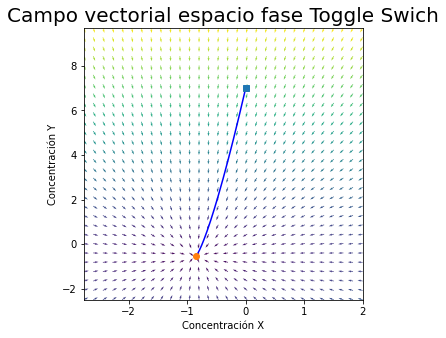

In [84]:
varf = []
campvec = []
coef = []
for i in range (0, 4):
    #constantes
    a1=random.randint(0,10)
    a2=random.randint(0,10)
    b1=random.randint(-10,10)
    b2=random.randint(-10,10)
    d1=random.randint(0,10)
    d2=random.randint(0,10)
    n=random.randint(0,5)
    
    coef1=[a1,a2,b1,b2,d1,d2,n]
    coef.append(coef1)
    def f(t,y):
        
        #asignar a cada ODE a un elemento de vector
        X=y[0]
        Y=y[1]
    
        #definimos cada ODE
        #dX_dt=a1/(1+Y**n)-d1*X+b1
        #dY_dt=a2/(1+X**n)-d2*Y+b2
        dX_dt=a1/(1+Y**n)-d1*X+b1
        dY_dt=a2/(1+X**n)-d2*Y+b1
    
        return [dX_dt,dY_dt]

    #Declaramos el vector de tiempo
    t_span=[0,20]
    times=np.linspace(t_span[0], t_span[1], 7000)
    
    varfci2 = []
    for i_ci in range (0,5):
        #Definimos las condiciones iniciales
        y0=np.array([random.randint(0,10),random.randint(0,10)])

        #Resolvemos
        sol=solve_ivp(f, t_span, y0,t_eval=times) #Modificar manualmente el intervalo de tiempo
        #sol=solve_ivp(f, t_span, y0) #Dejar que la librería elija el mejor intervalo
        tiempo= sol.t
        var1= sol.y[0]
        var2= sol.y[1]

        #Graficamos
        plt.figure(figsize=(5,5))
        plt.plot(tiempo,var1, label=" Concentración X")
        plt.plot(tiempo,var2, label="Concentración Y")
        plt.xlabel('Tiempo')
        plt.ylabel('Concentración de genes')
        plt.title('Simulación Toggle Swich', fontsize=20)
        plt.legend()
        plt.show()

        plt.figure(figsize=(5,5))
        plt.plot(var1,var2, "g")
        plt.plot(var1[0],var2[0],'s') #start
        plt.plot(var1[-1],var2[-1],'o')#end
        plt.xlabel('Concentración X')
        plt.ylabel('Concentración Y')
        plt.title('Espacio fase Toggle Swich', fontsize=20)
        plt.show()
        
        varfci = np.append([var1],[var2], axis = 0)
        varfci2.append(varfci)
        ## Graficamos el campo vectorial

        x_range_neg=min(var1)-2-0.1*min(var1)
        x_range_pos=max(var1)+2+0.1*max(var1)
        y_range_neg=min(var2)-2-0.1*min(var2)
        y_range_pos=max(var2)+2+0.1*max(var2)

        y1 = np.linspace(x_range_neg, x_range_pos, 30)
        y2 = np.linspace(y_range_neg, y_range_pos, 30)

        Y1, Y2 = np.meshgrid(y1, y2)

        t1 = 0

        u, v = np.zeros(Y1.shape), np.zeros(Y2.shape)

        NI, NJ = Y1.shape
        
        u1, v1 = f(t1,[Y1, Y2])
        u,v = f(t1,[Y1, Y2])
        M = (np.hypot(u,v))
        u /= M
        v /= M

        plt.figure(figsize=(5,5))
        plt.plot(sol.y[0], sol.y[1], 'b-') # path
        plt.plot([sol.y[0,0]], [sol.y[1,0]], 's') # start
        plt.plot([sol.y[0,-1]], [sol.y[1,-1]], 'o') # end
        Q = plt.quiver(Y1, Y2, u, v, M, angles='xy')
        plt.title('Campo vectorial espacio fase Toggle Swich', fontsize=20)
        plt.xlim([x_range_neg, x_range_pos])
        plt.ylim([y_range_neg, y_range_pos])
        plt.xlabel('Concentración X')
        plt.ylabel('Concentración Y')
        
    campvecci = np.append([u1],[v1], axis = 0)
    
    varf.append(varfci2)
    campvec.append(campvecci)
    print('--------------------------------------------')

In [35]:
np.shape(varf)

(3, 5, 2, 7000)

In [83]:
np.shape(campvec)

(4, 2, 30, 30)

In [57]:
print(campvec[:,:,:,0,0])

TypeError: list indices must be integers or slices, not tuple

In [77]:
M

array([[11.99884791, 11.24271211, 10.58696722, 10.04753135,  9.63826226,
         9.36758256,  9.23455243,  9.22545459,  9.31237148,  9.45672242,
         9.62757841,  9.85844241, 10.33185184, 11.28833574, 12.7207636 ,
        14.36372725, 15.96600585, 17.4483843 , 18.83043398, 20.14820634,
        21.42901317, 22.69004278, 23.94148156, 25.18923243, 26.43666874,
        27.68567972, 28.93728138, 30.19197406, 31.44995359, 32.71123733],
       [11.99885279, 11.24271634, 10.58697067, 10.04753389,  9.63826377,
         9.36758294,  9.23455162,  9.22545259,  9.31236832,  9.45671814,
         9.62757306,  9.85843607, 10.33184472, 11.28832826, 12.72075609,
        14.36371983, 15.96599849, 17.44837694, 18.83042657, 20.14819887,
        21.42900563, 22.69003517, 23.94147389, 25.1892247 , 26.43666096,
        27.6856719 , 28.93727352, 30.19196616, 31.44994565, 32.71122937],
       [11.99885825, 11.24272107, 10.58697453, 10.04753673,  9.63826546,
         9.36758336,  9.23455072,  9.22545035,  9

In [78]:
c

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1

In [80]:
c=np.sqrt(u1**2+v1**2)

In [81]:
c == M

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True],
       [ True,  True,  True,

In [85]:
np.shape(coef)

(4, 7)